In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5,5,3,1,3
length_of_service,8,4,7,10,2


# EDA

In [3]:
#EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Text(0.5, 0.98, 'Numerical Variables')

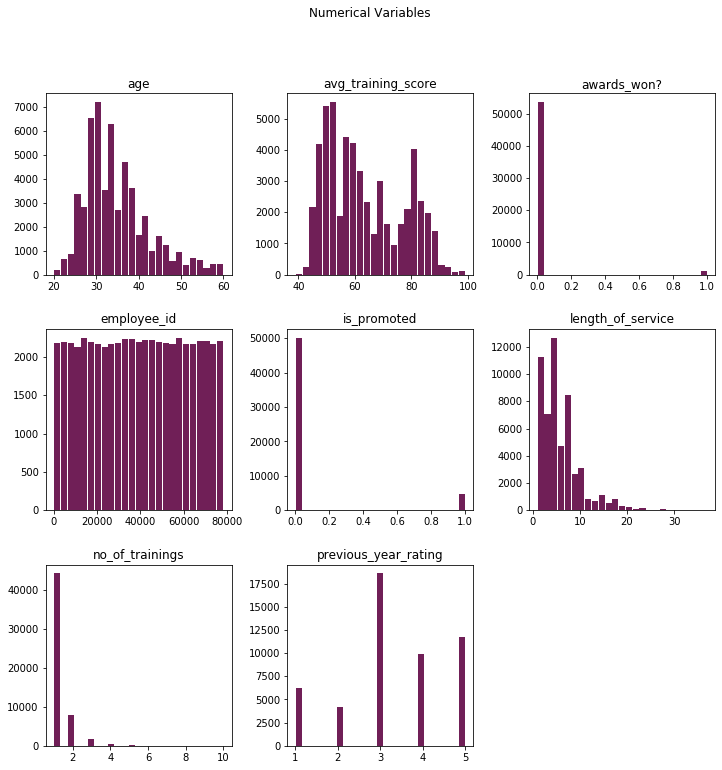

In [4]:
#numerical variables including target

ax = train.hist(bins=25, grid=False, figsize=(12,12),color='#701F57',zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

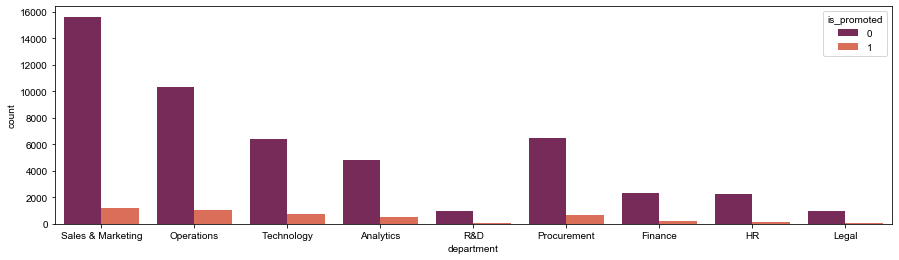

In [5]:
# categorical features - department
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

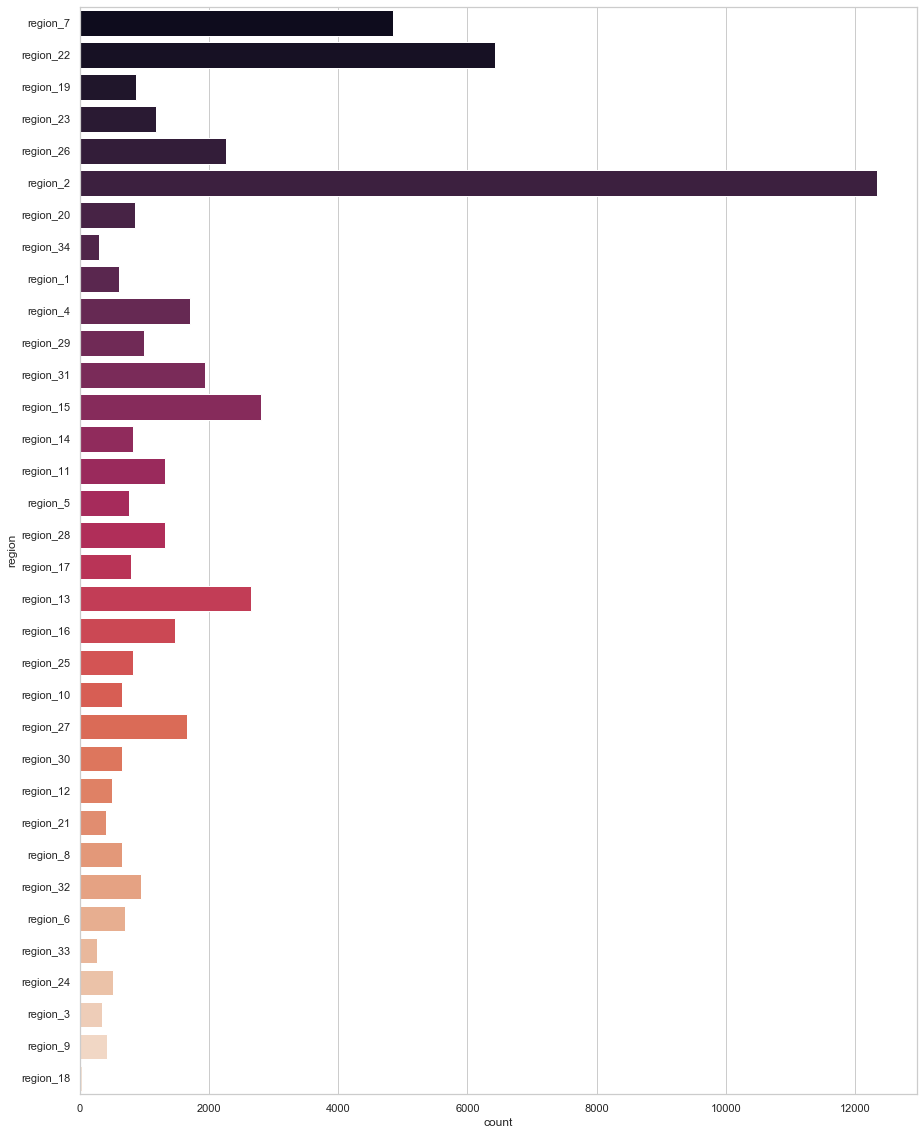

In [6]:
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=train, palette="rocket")
sns.set(style="whitegrid")
plt.show()

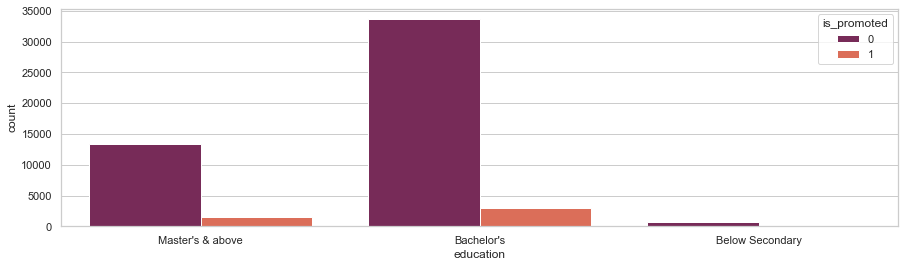

In [7]:
# categorical features - education
plt.figure(figsize=(15,4))
ax = sns.countplot(x="education",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

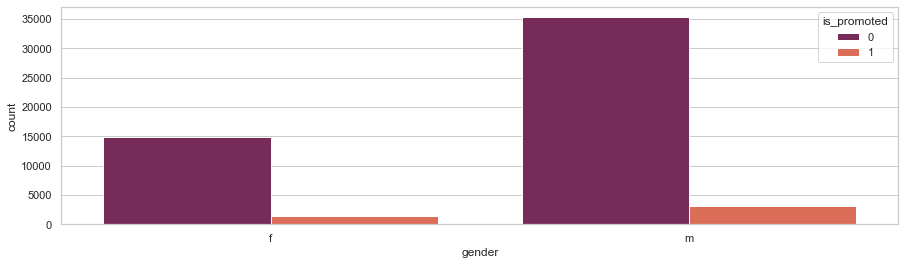

In [8]:
# categorical features - gender
plt.figure(figsize=(15,4))
ax = sns.countplot(x="gender",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

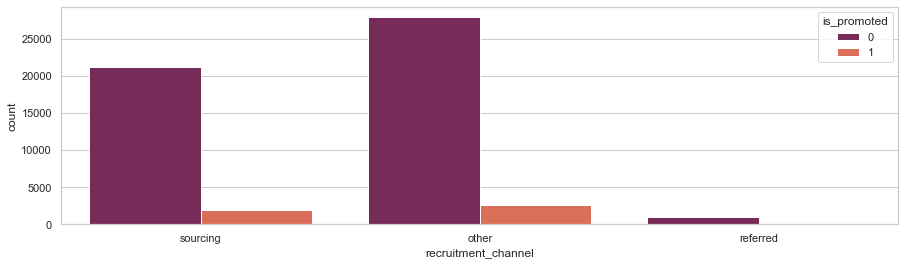

In [9]:
# categorical features - recruitment_channel
plt.figure(figsize=(15,4))
ax = sns.countplot(x="recruitment_channel",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

# Preprocessing

In [10]:
#merge train and test for preprocessing
df = train
df = df.append(test)
df.shape

(78298, 13)

## Missing Values

In [11]:
#checking missing values
print("Education NA: ",(df.education.isna().sum()/len(df))*100)
print("Previous Year Rating NA: ",(df.previous_year_rating.isna().sum()/len(df))*100)

Education NA:  4.397302613093566
Previous Year Rating NA:  7.581291987023935


In [12]:
df.education.value_counts(normalize=True,dropna=False)

Bachelor's          0.667284
Master's & above    0.273685
NaN                 0.043973
Below Secondary     0.015058
Name: education, dtype: float64

In [13]:
df.education.value_counts(normalize=True)

Bachelor's          0.697976
Master's & above    0.286273
Below Secondary     0.015750
Name: education, dtype: float64

In [14]:
#treating na as a new category called missing
df['education'] = df['education'].fillna('Missing')
df.education.value_counts(normalize=True,dropna=False)

Bachelor's          0.667284
Master's & above    0.273685
Missing             0.043973
Below Secondary     0.015058
Name: education, dtype: float64

In [15]:
df.previous_year_rating.value_counts(normalize=True,dropna=False)

3.0    0.338949
5.0    0.215050
4.0    0.180413
1.0    0.113707
2.0    0.076068
NaN    0.075813
Name: previous_year_rating, dtype: float64

In [16]:
df.previous_year_rating.value_counts(normalize=True)

3.0    0.366753
5.0    0.232691
4.0    0.195213
1.0    0.123034
2.0    0.082308
Name: previous_year_rating, dtype: float64

In [17]:
df.previous_year_rating.median()

3.0

In [18]:
#replace missing value with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)
df.previous_year_rating.value_counts(normalize=True,dropna=False)

3.0    0.414762
5.0    0.215050
4.0    0.180413
1.0    0.113707
2.0    0.076068
Name: previous_year_rating, dtype: float64

## One Hot Encoder

In [19]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['department','region','education','gender','recruitment_channel']]).toarray()
ohe_arr

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
#creating a df
ohe_labels = ohe.get_feature_names(['department','region','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
#drop columns
df.drop(columns= ['department','region','education','gender','recruitment_channel'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   no_of_trainings       78298 non-null  int64  
 2   age                   78298 non-null  int64  
 3   previous_year_rating  78298 non-null  float64
 4   length_of_service     78298 non-null  int64  
 5   awards_won?           78298 non-null  int64  
 6   avg_training_score    78298 non-null  int64  
 7   is_promoted           54808 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 5.4 MB


In [22]:
#concat dfs
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   no_of_trainings               78298 non-null  int64  
 2   age                           78298 non-null  int64  
 3   previous_year_rating          78298 non-null  float64
 4   length_of_service             78298 non-null  int64  
 5   awards_won?                   78298 non-null  int64  
 6   avg_training_score            78298 non-null  int64  
 7   is_promoted                   54808 non-null  float64
 8   department_Analytics          78298 non-null  float64
 9   department_Finance            78298 non-null  float64
 10  department_HR                 78298 non-null  float64
 11  department_Legal              78298 non-null  float64
 12  department_Operations         78298 non-null  float64
 13  d

### Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.000000,0.375,1.0,0.194444,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.0,0.083333,0.0,0.350000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.5,0.166667,0.0,0.183333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.0,0.250000,0.0,0.183333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.5,0.027778,0.0,0.566667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [24]:
#separate train and test datasets
train, test = df[~df['is_promoted'].isnull()], df[df['is_promoted'].isnull()]
train.shape, test.shape

((54808, 60), (23490, 60))

### Target

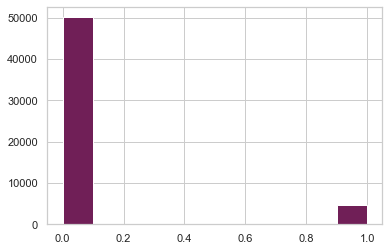

In [25]:
train.is_promoted.hist(color='#701F57')
plt.show()

In [26]:
train.is_promoted.value_counts(normalize=True)

0.0    0.91483
1.0    0.08517
Name: is_promoted, dtype: float64

In [27]:
train.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

### Random Seed

In [28]:
seed_value = 12321
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

### Validation Data

In [29]:
train.drop(columns=['employee_id'],inplace=True)
train.columns

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'regio

In [30]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3,random_state=seed_value)

In [31]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
26344,0.111111,0.325,1.00,0.166667,0.0,0.366667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21538,0.000000,0.300,1.00,0.111111,0.0,0.383333,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15489,0.000000,0.825,0.25,0.222222,0.0,0.200000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15565,0.000000,0.275,1.00,0.111111,0.0,0.116667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48575,0.000000,0.525,0.50,0.055556,0.0,0.816667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
X_valid.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
52257,0.000000,0.475,0.25,0.083333,0.0,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
19317,0.111111,0.275,0.75,0.250000,0.0,0.816667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
28876,0.000000,1.000,0.00,0.083333,0.0,0.166667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
29932,0.000000,0.275,0.75,0.055556,0.0,0.633333,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
35815,0.000000,0.775,1.00,0.111111,0.0,0.366667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


### Feature Selection

In [33]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.        , 0.00297877, 0.01267889, 0.00440174, 0.00963867,
       0.02748376, 0.00015469, 0.00025409, 0.        , 0.        ,
       0.        , 0.        , 0.00176708, 0.        , 0.00121593,
       0.        , 0.00075652, 0.00063922, 0.        , 0.00218377,
       0.00087919, 0.00029936, 0.00086642, 0.00090529, 0.        ,
       0.00218401, 0.00115845, 0.00079566, 0.        , 0.0009748 ,
       0.        , 0.00026715, 0.00060171, 0.        , 0.00064101,
       0.00048697, 0.0009793 , 0.0005193 , 0.        , 0.        ,
       0.        , 0.00031094, 0.        , 0.00126517, 0.        ,
       0.        , 0.00058909, 0.        , 0.00088197, 0.00404912,
       0.        , 0.00143088, 0.        , 0.        , 0.00277867,
       0.00126965, 0.00060488, 0.00254646])

In [34]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

avg_training_score              0.027484
previous_year_rating            0.012679
awards_won?                     0.009639
length_of_service               0.004402
education_Bachelor's            0.004049
age                             0.002979
gender_m                        0.002779
recruitment_channel_sourcing    0.002546
region_region_19                0.002184
region_region_13                0.002184
department_R&D                  0.001767
education_Master's & above      0.001431
recruitment_channel_other       0.001270
region_region_4                 0.001265
department_Technology           0.001216
region_region_2                 0.001158
region_region_29                0.000979
region_region_22                0.000975
region_region_17                0.000905
region_region_9                 0.000882
region_region_14                0.000879
region_region_16                0.000866
region_region_20                0.000796
region_region_10                0.000757
region_region_27

In [35]:
from sklearn.feature_selection import SelectKBest

select_top40 = SelectKBest(mutual_info_classif,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

Index(['no_of_trainings', 'age', 'previous_year_rating', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_HR',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_16', 'region_region_18',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_28', 'region_region_32',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'education_Missing', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [36]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select]

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_HR,department_R&D,department_Sales & Marketing,department_Technology,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
26344,0.111111,0.325,1.00,0.0,0.366667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21538,0.000000,0.300,1.00,0.0,0.383333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15489,0.000000,0.825,0.25,0.0,0.200000,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15565,0.000000,0.275,1.00,0.0,0.116667,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48575,0.000000,0.525,0.50,0.0,0.816667,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33795,0.000000,0.525,0.50,0.0,0.466667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54149,0.000000,0.450,0.75,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
37292,0.000000,0.550,1.00,0.0,0.083333,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
23591,0.000000,0.175,1.00,0.0,0.766667,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Classification Models

In [37]:
#import modules

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [38]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]
  

In [39]:
# calculating models scores
#scores = []
#for name, clf in zip(names, classifiers):
 #   clf.fit(X_train, y_train)
  #  score = clf.score(X_valid, y_valid)
   # scores.append(score)

In [40]:
#dataframe models
#models = pd.DataFrame()
#models['name'] = names
#models['score'] = scores
#models.sort_values(by='score',ascending=False)

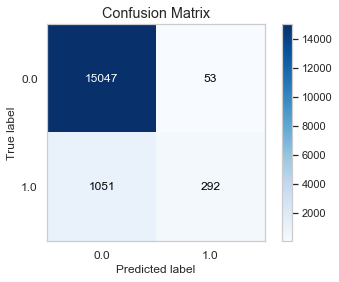

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scikitplot as skplt

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)

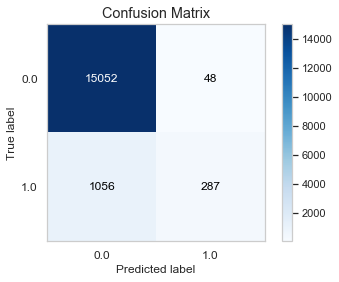

In [43]:
# model only the top_35 features
#adc.fit(X_train[feat_select], y_train)
#preds_valid = adc.predict(X_valid[feat_select])
#skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)

## Desbalanced Target

In [44]:
#oversampling '1.0' - is_promoted

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros,y_ros= ros.fit_resample(X_train,y_train)
y_ros.value_counts()


1.0    35040
0.0    35040
Name: is_promoted, dtype: int64

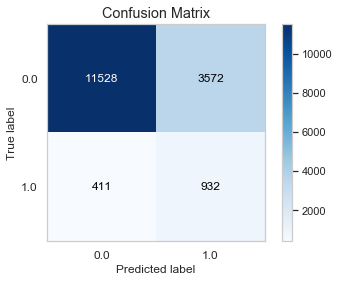

In [45]:
adc.fit(X_ros, y_ros)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)